In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline,make_pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn import metrics
import plotly.express as px
!pip install chart_studio

import chart_studio.plotly as py
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
import re
from wordcloud import WordCloud 


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.0 MB/s eta 0:00:00


##  Reading and preparation of data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [3]:
# Load data
train_data = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_data = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
sub_sample = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")



In [4]:
# Print shape of data
print ("Train data :",train_data.shape)
print ("Test data :",test_data.shape)
print ("Sample data :",train_data.shape)

Train data : (7613, 5)
Test data : (3263, 4)
Sample data : (7613, 5)


### Data visualization

In [5]:
# display first 10 rows of the data
train_data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [6]:
test_data.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [7]:
#Print a concise summary of a data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
#Print a concise summary of a data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [9]:
#check duplicate for train data
train_data.duplicated().sum()

0

In [10]:
#check duplicate test data
test_data.duplicated().sum()

0

<Axes: >

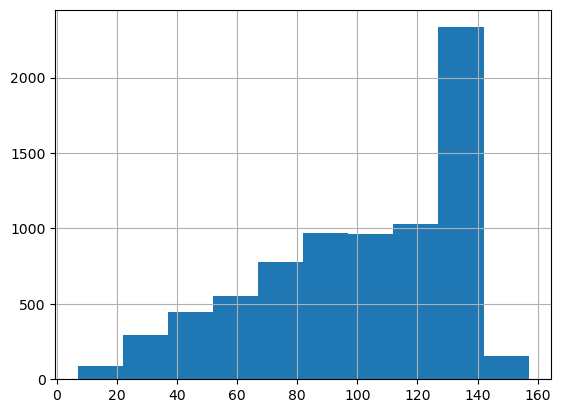

In [11]:
# Word frequency analysis
train_data['text'].str.len().hist()

<Axes: >

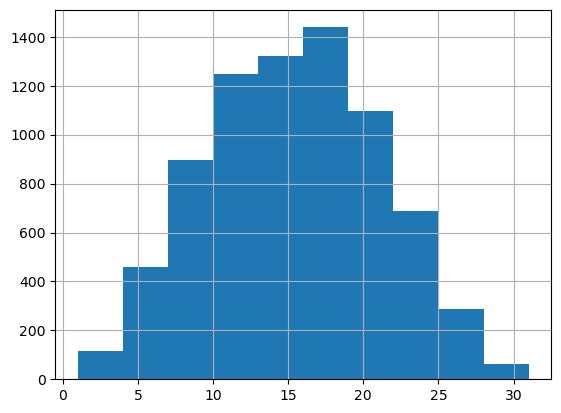

In [12]:
# word level frequency distribution
train_data['text'].str.split().map(lambda x: len(x)).hist()

In [13]:
print (train_data.keyword.nunique(), test_data.keyword.nunique())

221 221


Frequently happened words

### Top Keywords
Keyword extraction allows you to quickly locate the most essential words and phrases in large datasets.

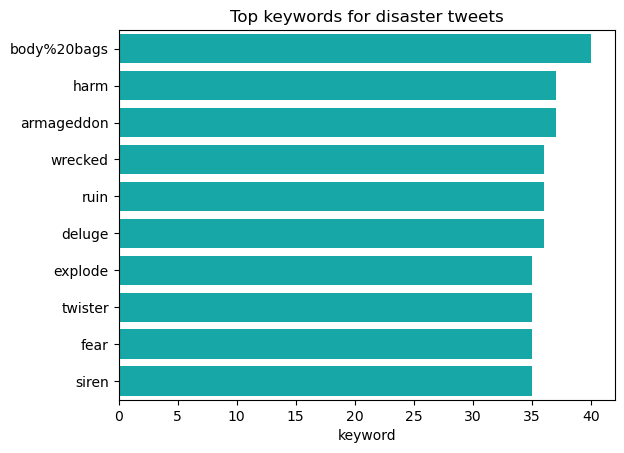

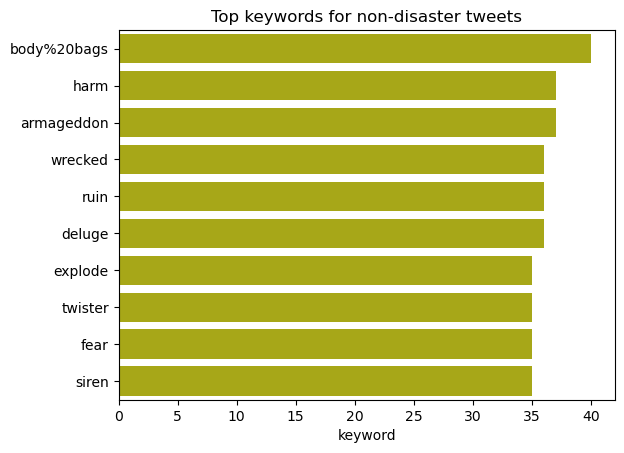

In [14]:
keywords = train_data[train_data.target==0].keyword.value_counts().head(10)


sns.barplot(x=keywords, y=keywords.index, color='c')
plt.title('Top keywords for disaster tweets')
plt.show()
sns.barplot(x=keywords, y=keywords.index, color='y')
plt.title('Top keywords for non-disaster tweets')
plt.show()

In [15]:
# Check number of unique keywords and locations
print (train_data.location.nunique(), test_data.location.nunique())

3341 1602


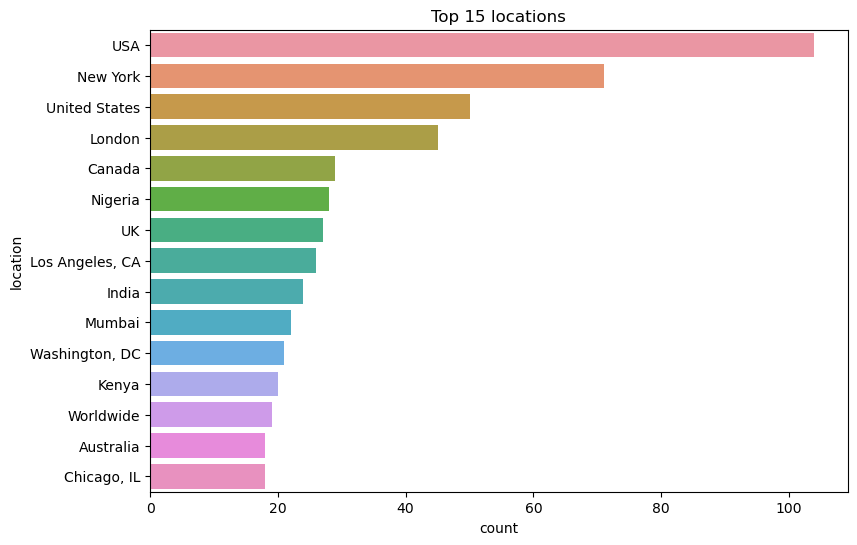

In [16]:
# Most common locations
plt.figure(figsize=(9,6))
sns.countplot(y=train_data.location, order = train_data.location.value_counts().iloc[:15].index)
plt.title('Top 15 locations')
plt.show()

### Content of fake and true tweets

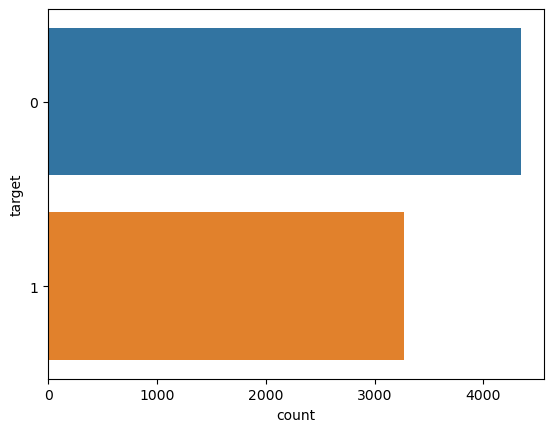

In [17]:
# check Class balance
# train.target.value_counts()
sns.countplot(y=train_data.target);

Difference between target 0 and 1:  1071


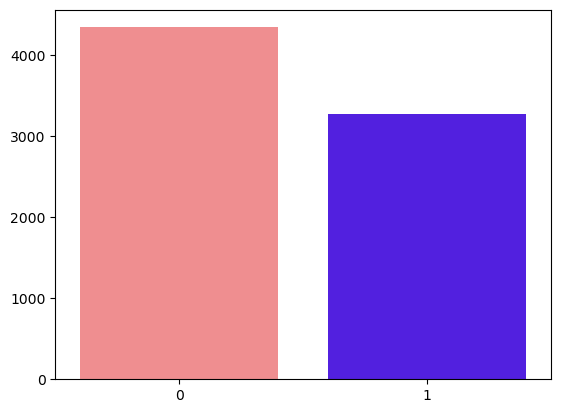

In [18]:
#Target Counts
y = np.array(train_data.target.value_counts())
sns.barplot(x = [0,1],y = y,palette='gnuplot2_r')
difference = y[0]-y[1]
print("Difference between target 0 and 1: ",y[0]-y[1])

(-0.5, 1599.5, 799.5, -0.5)

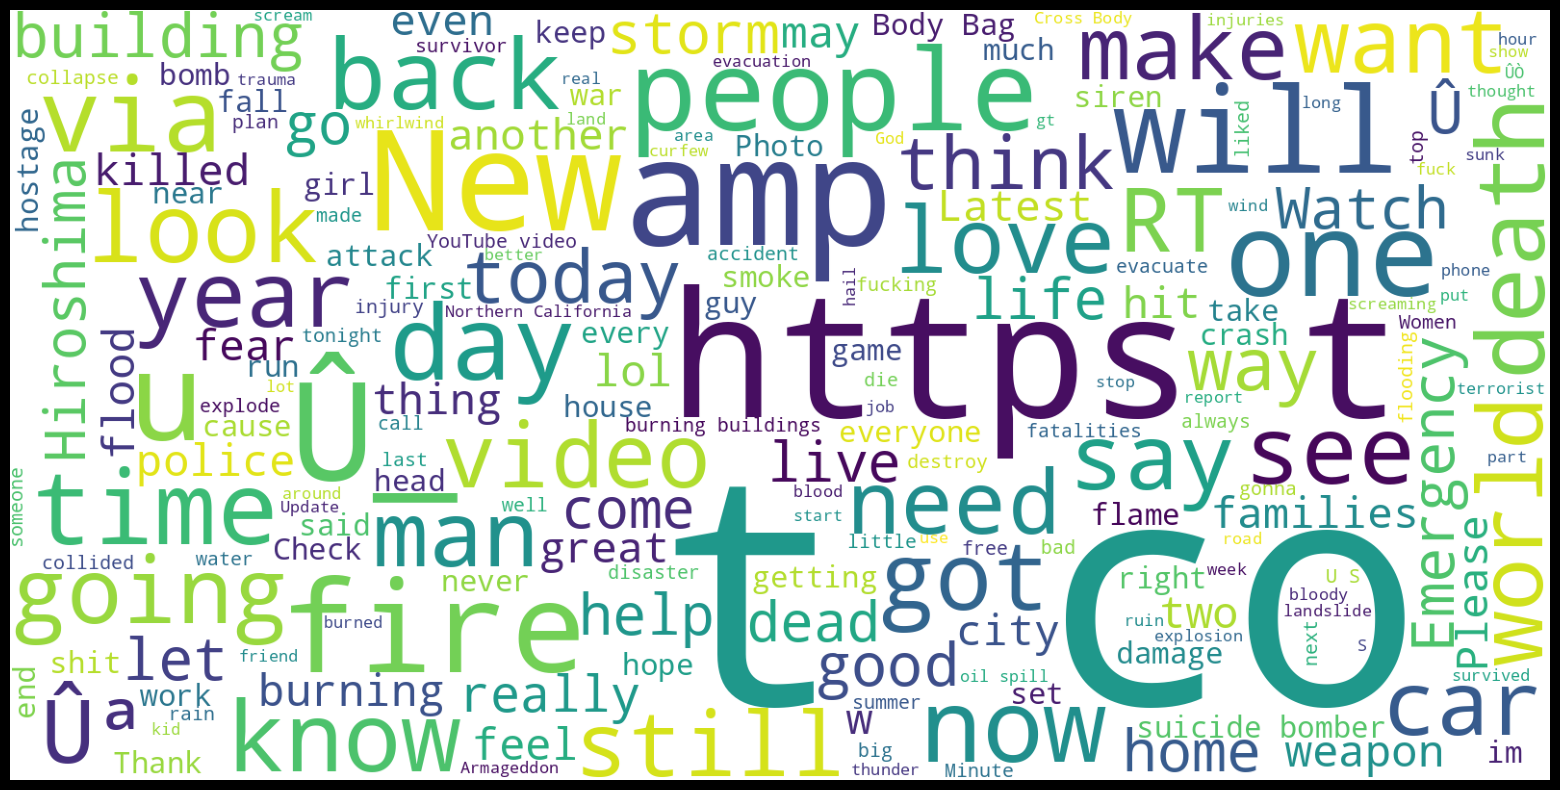

In [19]:

#WordCloud view of positive reviews:

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(train_data['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

## Preprocessing

### Stop word removal
The idea is simply removing the words that occur commonly across all the documents in the corpus. Typically, articles and pronouns are generally classified as stop words.

### Stemming
is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling.

### Tokenization 
Is the start of the NLP process,
converting sentences into understandable bits of data that a program can work with.

In [20]:
# Preprocessing functions
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text


def remove_stopwords(tokens):
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

def perform_stemming(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [21]:
# Preprocessing
train_data.fillna("", inplace=True)
test_data.fillna("", inplace=True)

train_data["text"] = train_data["text"].apply(preprocess_text)
test_data["text"] = test_data["text"].apply(preprocess_text)

train_data["text"] = train_data["text"].apply(word_tokenize)
test_data["text"] = test_data["text"].apply(word_tokenize)

train_data["text"] = train_data["text"].apply(remove_stopwords)
test_data["text"] = test_data["text"].apply(remove_stopwords)

train_data["text"] = train_data["text"].apply(perform_stemming)
test_data["text"] = test_data["text"].apply(perform_stemming)

In [22]:
data = train_data[['text','target']]
data.head()

,text,target
0,"[deed, reason, earthquak, may, allah, forgiv, us]",1
1,"[forest, fire, near, la, rong, sask, canada]",1
2,"[resid, ask, shelter, place, notifi, offic, ev...",1
3,"[peopl, receiv, wildfir, evacu, order, califor...",1
4,"[got, sent, photo, rubi, alaska, smoke, wildfi...",1


### TF-IDF Vectorizer
Is a measure of originality of a word by comparing the number of times a word appears in document with the number of documents the word appears in

In [23]:
# Convert the tokenized text back to strings
train_data["text"] = train_data["text"].apply(lambda tokens: " ".join(tokens))
test_data["text"] = test_data["text"].apply(lambda tokens: " ".join(tokens))

In [24]:
train_data.head()

,id,keyword,location,text,target
0,1,,,deed reason earthquak may allah forgiv us,1
1,4,,,forest fire near la rong sask canada,1
2,5,,,resid ask shelter place notifi offic evacu she...,1
3,6,,,peopl receiv wildfir evacu order california,1
4,7,,,got sent photo rubi alaska smoke wildfir pour ...,1


### TF-IDF vectorizer
TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions. 

TF-IDF Vectorizer is a measure of originality of a word by comparing the number of times a word appears in document with the number of documents the word appears in

In [25]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)


In [26]:
# Transform text data
X = vectorizer.fit_transform(train_data["text"])
y = train_data["target"]

In [27]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.79
Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       874
           1       0.80      0.68      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



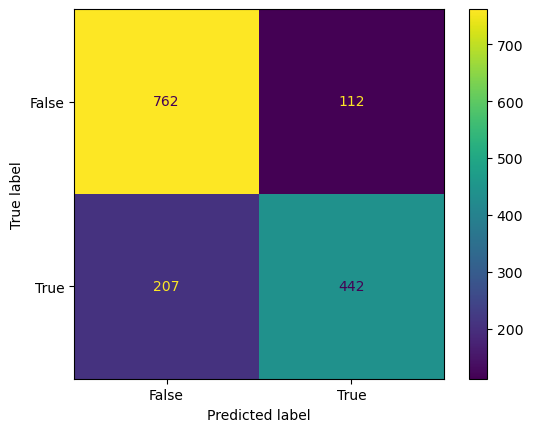

In [28]:
# Models
model=LogisticRegression()
# fitting model
model.fit(X_train, y_train)
# Evaluate Random forest model

# Predict on validation set
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_val, y_pred)
print("Report:\n", report)
# Predict on test set
X_test = vectorizer.transform(test_data["text"])
test_predictions = model.predict(X_test)
# Confusion matrtix
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [29]:
# Create submission file
submission = pd.DataFrame({"id": test_data["id"], "target": test_predictions})
submission.to_csv("submission.csv", index=False)

In [30]:
submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
